# 2025 SAINTS Hackathon Challenge: **Sinegugu Mthembu**

## Objective is to predict maintainance failure: **Real predictive maintenance problems from iThemba LABS cyclotrons.**
## Classification task
####-[0] No failure
####-[1] A failure has occured

In [ ]:
pip install tensorflow scikit-learn

In [ ]:
pip install tensorflow scikit-learn

In [ ]:
pip install scikeras


In [ ]:
pip install keras scikit-learn


Load Libraries:

In [ ]:
pip install uproot3


In [ ]:
pip install awkward

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import uproot3
import awkward as ak

import math
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD
from keras import optimizers, initializers

import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import itertools
from itertools import chain

import tensorflow as tf
from tensorflow.keras import optimizers, initializers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DS_Projects_2025/predictive_maintenance.csv')

In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


The data above has 250000 Rows and 32 columns.

In [ ]:
df.shape

(10000, 10)

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.describe(include='O')

,Product ID,Type,Failure Type
count,10000,10000,10000
unique,10000,3,6
top,L57163,L,No Failure
freq,1,6000,9652


In [ ]:
# Checking the different types
df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [ ]:
# Checking the different failure types
df['Failure Type'].unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

The number of failures compared to no failure is: Target
0    9661
1     339
dtype: int64


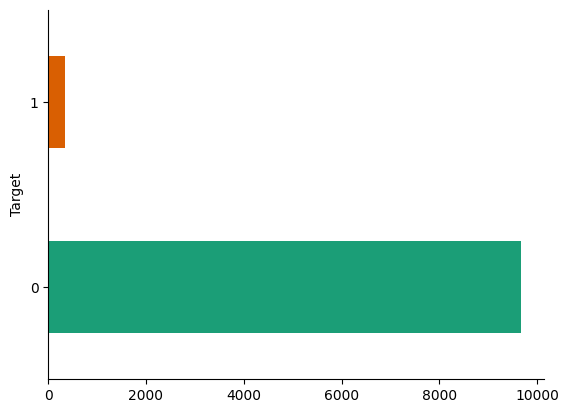

In [ ]:
# checking the number of failures compared to no failure
df.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Number_of_Failures = df.groupby('Target').size()
print("The number of failures compared to no failure is:", Number_of_Failures)

#df[df['Target'] == 0].shape, df[df['Target'] == 1].shape

In [ ]:
df_copy=df.copy()
#drop the column Product ID as it has no significant meaning except for counting.
df = df.drop('Product ID', axis=1)
#drop the column UDI as it has no significant meaning.
df = df.drop('UDI', axis=1)
#drop the column Failure type
df = df.drop('Failure Type', axis=1)

In [ ]:
Failure = df[df['Target'] == 1]
No_Failure = df[df['Target'] == 0]

In [ ]:
# Checking how the df looks now
df.head(10)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
5,M,298.1,308.6,1425,41.9,11,0
6,L,298.1,308.6,1558,42.4,14,0
7,L,298.1,308.6,1527,40.2,16,0
8,M,298.3,308.7,1667,28.6,18,0
9,M,298.5,309.0,1741,28.0,21,0


In [ ]:
#Having a look at just the failed processes
Failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
50,L,298.9,309.1,2861,4.6,143,1
69,L,298.9,309.0,1410,65.7,191,1
77,L,298.8,308.9,1455,41.3,208,1
160,L,298.4,308.2,1282,60.7,216,1
161,L,298.3,308.1,1412,52.3,218,1


In [ ]:
#Having a look at just the working processes
No_Failure.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0


In [ ]:
def draw(feature):
   no_fail=No_Failure[feature]
   fail=Failure[feature]

   from matplotlib.lines import Line2D

   rng = np.random.default_rng(seed=123)

   weig1 = np.ones_like(No_Failure[feature]) / float(len(No_Failure[feature]))
   weig2 = np.ones_like(Failure[feature]) / float(len(Failure[feature]))

   fig, ax = plt.subplots(figsize=(5,5))
   ax.hist(fail, bins=35, histtype='step', range=(fail.min(), fail.max()), label=r'Failure', alpha=.7, linewidth=2)
   ax.hist(no_fail, bins=35, histtype='step', range=(no_fail.min(), no_fail.max()), label=r'No failure', alpha=.7, linewidth=2)

   plt.ylabel('Normalised to one', fontsize=20, labelpad=15)
   plt.xlabel(feature, fontsize=20, labelpad=15)
   plt.xticks(fontsize=15, rotation=0)
   plt.yticks(fontsize=15)
   plt.legend(fontsize=15)
   plt.tight_layout()
   plt.legend(fontsize=15, loc='best', frameon=False)
#  plt.savefig(feature+'.pdf')
   plt.show()

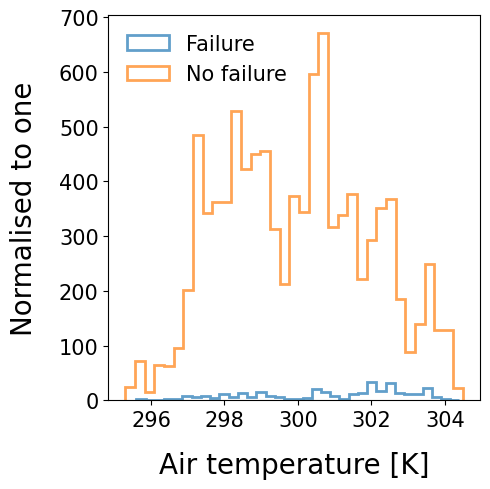

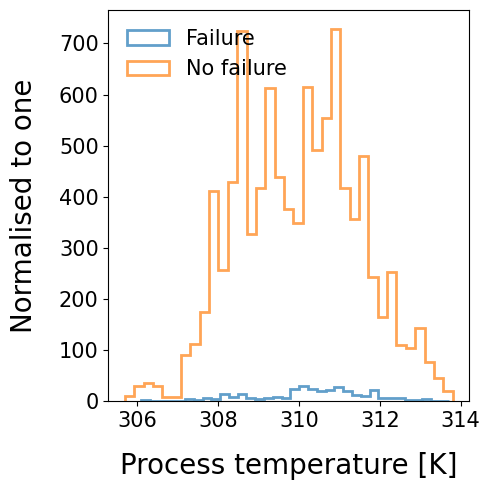

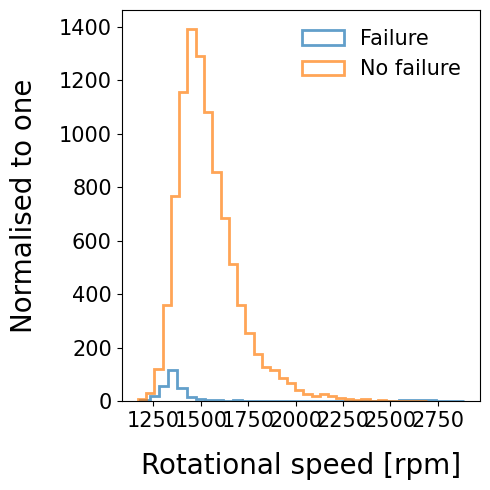

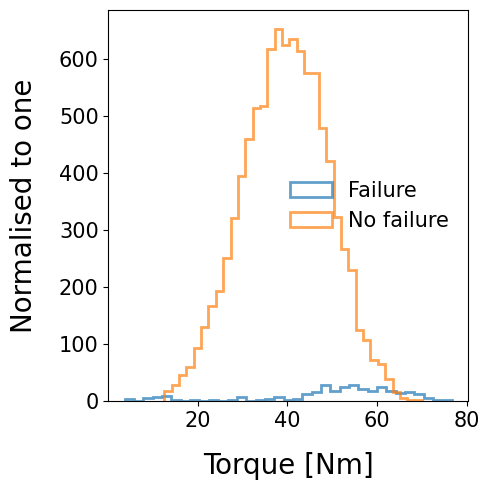

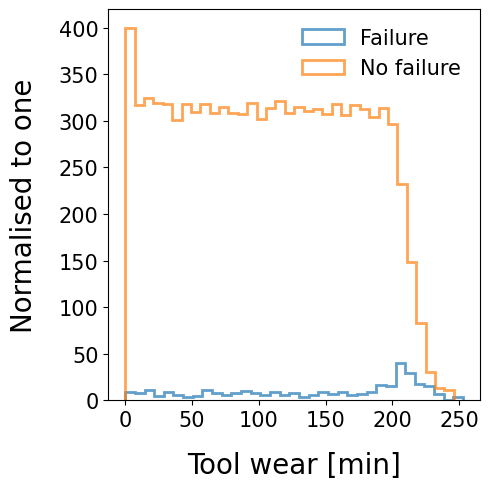

In [ ]:
#Having a look at the different features
#draw('Type') Not numeric
draw('Air temperature [K]')
draw('Process temperature [K]')
draw('Rotational speed [rpm]')
draw('Torque [Nm]')
draw('Tool wear [min]')
#draw('Failure Type') Not numeric but seems important to me

# Plotting the different failure types and the number of fails

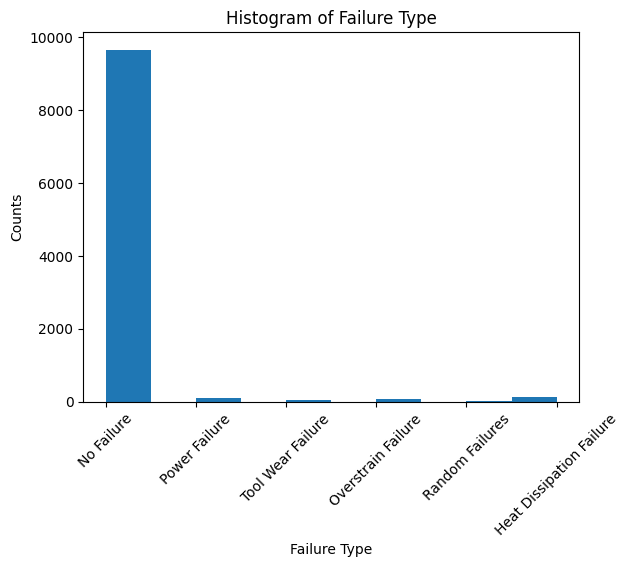

In [ ]:

plt.hist(df_copy['Failure Type'], bins=10)  # Adjust 'bins' as needed
plt.xlabel('Failure Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.ylabel('Counts')
plt.title('Histogram of Failure Type')
plt.show()
# Display the plot
plt.show()


**From these graphs we can see how failure is influence by the differences in the conditions. Below I explain how the different features behave for failure instances compared to normal operating conditions.**

* Air temperature - For normal operation or no failure the air temparature is
significantly higher and very low for all failures.

* Process temperature - Just like with air temperature for normal operation or no failure the pressure temparature is significantly higher and very low for all failures.

* Rotational speed - As expected for rotational speed no failure it is required to have very high speed and for all failed events the speed is quite low.

* Torque -Same as the rottional speed the failures occur when the torque is very low.

* Tool wear - The tool wear is small for failure occurances and high for no failure. I am not sure I understand what it means exactly. It probably has something to do with a machine being used too much, I think.


In [ ]:
# Select only the numeric columns
#numeric_cols = df.select_dtypes(include=['number']).columns

# Condition to keep rows where all numeric values are >= -10
#condition = (df[numeric_cols] >= -15).all(axis=1)

# Apply the condition to filter the DataFrame
#filtered_df = df[condition]

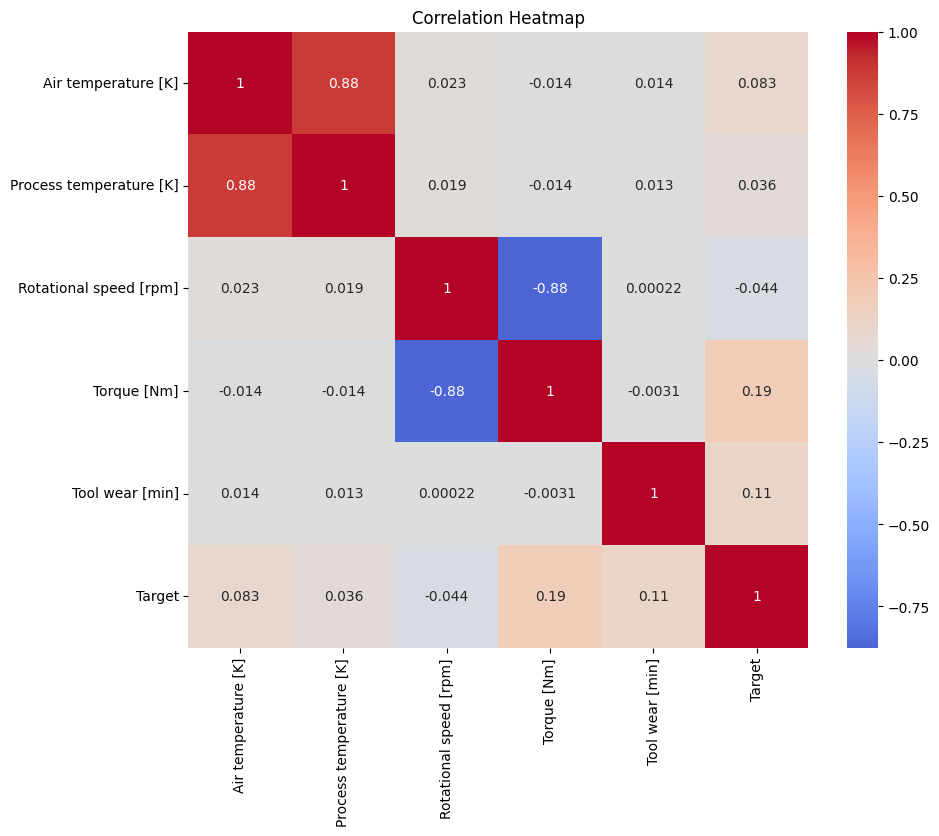

In [ ]:
# Checking the correlation between the features
plt.figure(figsize=(10, 8))
corr_matrix = df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

## From the correlation map: Temparature has a strong correlation with the target and Rotational speed has a strong negative correlation.

In [ ]:
#df=df.drop('Type', axis=1)
#df=df.drop('Failure Type', axis=1)

In [ ]:
X = df.drop('Target', axis=1)
Y = df['Target']

Split our data into trianing and testing, with 80% training and 20% testing:

In [ ]:
# Identify column types
numeric_features = X.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()  # Include 'object' type
# Preprocessing: scale numerics, encode categorical
preprocessor = ColumnTransformer(transformers=[
('num', StandardScaler(), numeric_features),
('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'),categorical_features)])  #sparse=False
# Fit and transform
#X_processed = preprocessor.fit_transform(X)
X_train_processed = preprocessor.fit_transform(X)  # Preprocess X_train
#X_test_processed = preprocessor.transform(X_test)  # Preprocess X_test



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_processed, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
#Here I'm checking if my features are correct.
print("The size of X_train_processed =", X_train.size)
print("The size of Y_train =", Y_train.size)
print("The numeric features are", numeric_features)
print("The categorical features are",categorical_features)

The size of X_train_processed = 64000
The size of Y_train = 8000
The numeric features are ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
The categorical features are ['Type']


# Feature Ranking

Feature rankings:
                        Feature  Ranking
3              num__Torque [Nm]        1
2   num__Rotational speed [rpm]        2
4          num__Tool wear [min]        3
0      num__Air temperature [K]        4
1  num__Process temperature [K]        5
6                   cat__Type_L        6
7                   cat__Type_M        7
5                   cat__Type_H        8


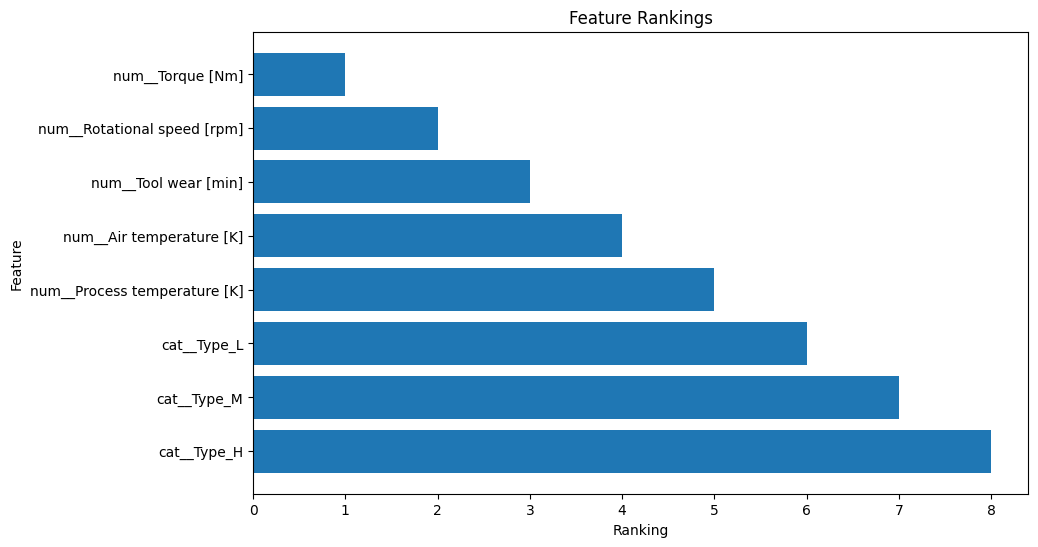

In [ ]:
# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=1)

# Fit RFE
rfe.fit(X_train, Y_train)

# Get the ranking of the features
ranking = rfe.ranking_

# Get feature names after preprocessing
feature_names_after_preprocessing = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
feature_ranking = pd.DataFrame({
    'Feature': feature_names_after_preprocessing,
    'Ranking': ranking
})

# Sort the DataFrame by ranking
feature_ranking = feature_ranking.sort_values(by='Ranking')

# Display the feature rankings
print("Feature rankings:")
print(feature_ranking)

# Plot the feature rankings
plt.figure(figsize=(10, 6))
plt.barh(feature_ranking['Feature'], feature_ranking['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Feature Rankings')
plt.gca().invert_yaxis()
plt.show()


In [1]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)


NameError: name 'X_train' is not defined

**From the feature ranking the most important features seem to be Failure Type and Torque and rotational speed** The Type (M,H,L) is not that important

Build my DNN model:

In [ ]:
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dropout(0.3),
Dense(32, activation='relu'),
Dropout(0.3),
Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0009),loss='binary_crossentropy',metrics=['accuracy'])

 Training my DNN as follows

In [ ]:
model.fit(X_resampled, Y_resampled,
          epochs=50,
          batch_size=32,
          validation_split=0.2,
          shuffle=True)


In [ ]:
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, shuffle=True)  # Using the X_train_processed

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9089 - loss: 0.3535 - val_accuracy: 0.9656 - val_loss: 0.1497
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9654 - loss: 0.1507 - val_accuracy: 0.9656 - val_loss: 0.1230
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9698 - loss: 0.1096 - val_accuracy: 0.9675 - val_loss: 0.1044
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9656 - loss: 0.1172 - val_accuracy: 0.9688 - val_loss: 0.1006
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9671 - loss: 0.1143 - val_accuracy: 0.9688 - val_loss: 0.1020
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9715 - loss: 0.1013 - val_accuracy: 0.9681 - val_loss: 0.0995
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9701 - loss: 0.0982 - val_accuracy: 0.9694 - val_loss: 0.1004
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9731 - loss: 0.0878 - val_accurac

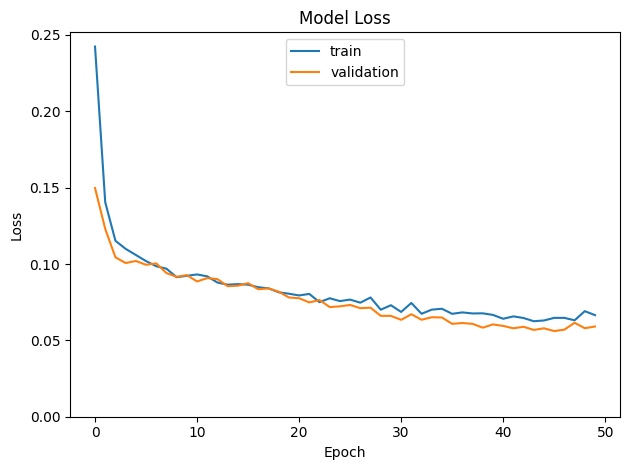

In [ ]:
plt.plot(history.history['loss'],"-")
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0,)
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
plt.show()

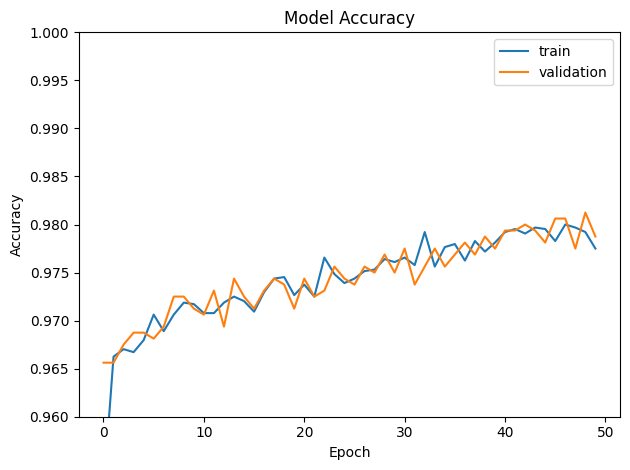

In [ ]:
plt.plot(history.history['accuracy'],"-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.96,1.0)
plt.legend([r'\bf{train}', r'\bf{validation}'],loc='best')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
plt.show()

# Printing out the model perfomance: Precision, recall and F1 score

In [ ]:
pred_train= model.predict(X_train)
pred_train= list(chain.from_iterable(pred_train))

scores= model.evaluate(X_train, Y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))

pred_test= model.predict(X_test)
pred_test= list(chain.from_iterable(pred_test))

scoresS2 = model.evaluate(X_test, Y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scoresS2[1], 1 - scoresS2[1]))

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy on training data: 0.9823750257492065% 
 Error on training data: 0.017624974250793457
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy on test data: 0.9764999747276306% 
 Error on test data: 0.023500025272369385


In [ ]:
# Predict probabilities
y_train_pred_proba =model.predict(X_train)
y_test_pred_proba = model.predict(X_test)

# Convert to binary 0/1 predictions using threshold 0.5
Y_train_pred = (y_train_pred_proba >0.5).astype(int)
Y_test_pred = (y_test_pred_proba >0.5).astype(int)

print(classification_report(Y_train, Y_train_pred))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      7729
           1       0.94      0.51      0.66       271

    accuracy                           0.98      8000
   macro avg       0.96      0.76      0.83      8000
weighted avg       0.98      0.98      0.98      8000



In [ ]:
import plotly.graph_objects as go
import numpy as np
# Predicted probabilities
y_probs = model.predict(X_test).flatten()
y_preds = (y_probs > 0.5).astype(int)
# Interactive scatter plot with hover info
fig = go.Figure()
fig.add_trace(go.Scatter(
y=y_probs,
mode='markers',
marker=dict(
size=8,
color=Y_test, # True class color
colorscale='RdBu',
showscale=True,
colorbar=dict(title="True Label")
),
text=[f"True: {yt}, Pred: {yp:.2f}" for yt, yp in zip(Y_test, y_probs)],
hoverinfo='text',
name='Predicted Probabilities'
))
fig.update_layout(
title=" Interactive DNN Output: Predicted Failure Probabilities",
xaxis_title="Sample Index",
yaxis_title="DNN Output (Probability of Failure)",
template="plotly_white",
height=500
)
fig.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Function to retrieve model results
def function1(label, probs):
    # Convert label to a numpy array
    label = np.array(label)
    failure = []
    no_failure = []
    for i in range(len(probs)):
        if label[i] == 1:
            failure.append(probs[i])
        elif label[i] == 0:
            no_failure.append(probs[i])
    return failure, no_failure

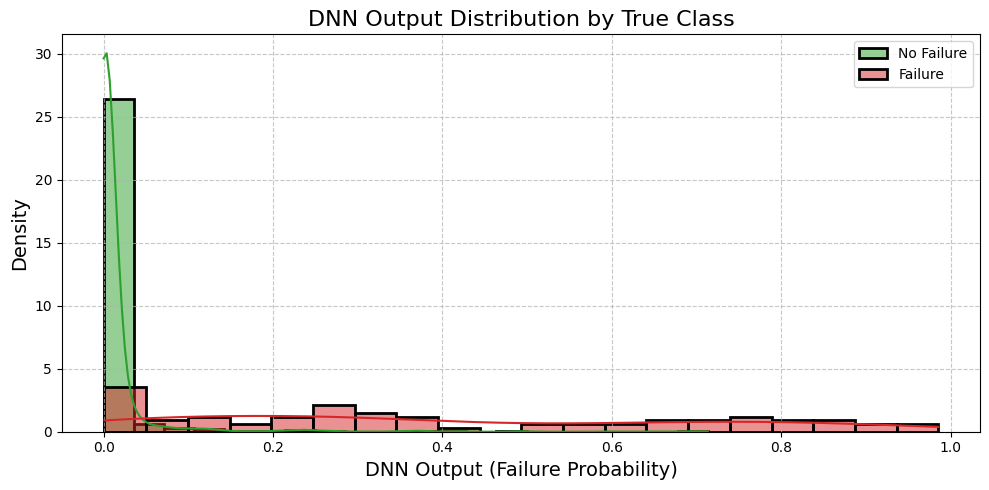

In [ ]:
# Class-wise score distribution using seaborn
plt.figure(figsize=(10, 5))
sns.histplot(y_probs[Y_test == 0], bins=20, kde=True, label='No Failure',
color='tab:green', stat='density', linewidth=2)
sns.histplot(y_probs[Y_test == 1], bins=20, kde=True, label='Failure',
color='tab:red', stat='density', linewidth=2)
plt.xlabel('DNN Output (Failure Probability)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('DNN Output Distribution by True Class', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# The classification report


In [ ]:
# Assuming y_preds and Y_test are defined as in your existing code
print(classification_report(Y_test, y_preds))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.84      0.38      0.53        68

    accuracy                           0.98      2000
   macro avg       0.91      0.69      0.76      2000
weighted avg       0.97      0.98      0.97      2000



# Confusion matrix

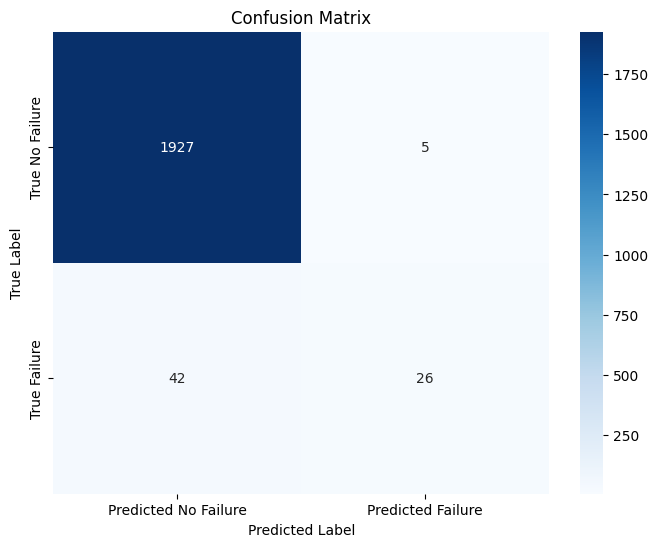

In [ ]:

cm = confusion_matrix(Y_test, y_preds)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No Failure', 'Predicted Failure'],
            yticklabels=['True No Failure', 'True Failure'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


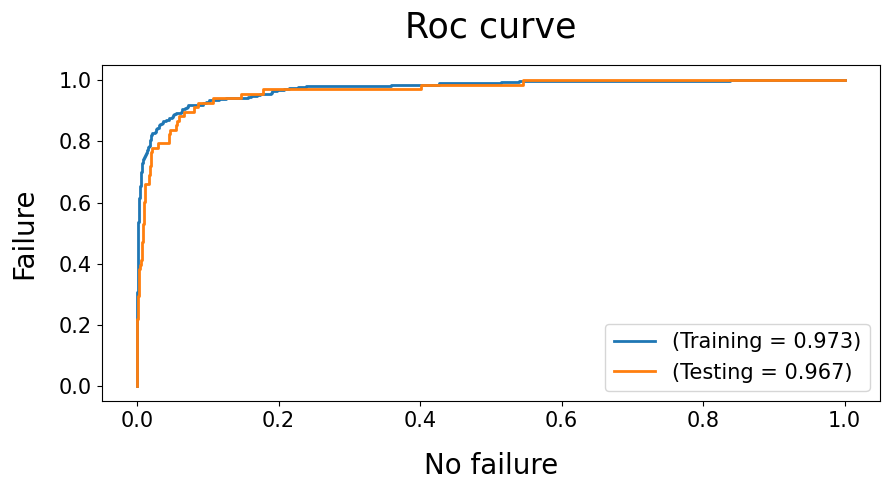

In [ ]:
from matplotlib.lines import Line2D

fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)
auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

fig, ax = plt.subplots(figsize=(9,5))


ax.plot(fpr_Train, tpr_Train,linewidth=2, label='(Training = {:.3f})'.format(auc(fpr_Train, tpr_Train)))
ax.plot(fpr_Test, tpr_Test,linewidth=2, label='(Testing = {:.3f})'.format(auc(fpr_Test, tpr_Test)))

# Add annotations
plt.ylabel('Failure', fontsize=20, labelpad=15)
plt.xlabel('No failure', fontsize=20, labelpad=15)
plt.title('Roc curve', fontsize=25, pad=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.tight_layout()

plt.show()

# **We can conclude that our model works very well and from the given data I was able to predict failures which are very vry small in quantity compared to normal operation. When I include the failure tpe my accuracy is too good so i removed it**